## Import required libraries 

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2  

import numpy as np
import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy   
import os
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs 
import cartopy.feature as cf
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

## Set variables

In [2]:
path_alt = '/home/hchaabani/Data/topo_atlas'
path_shx = '/home/hchaabani/Data/morocco_shx'
path_output = '/home/hchaabani/PHD-mountain-climate/First_Part/Results/figures/maps/v3/topo'

## Import data

In [3]:
shapefile = gpd.read_file(path_shx+'/Morocco.shp')
elevation = xr.open_dataset(path_alt+'/morocco_GMTED2010_15n015_00625deg.nc')

## Plots 

In [4]:
# This auxiliary function will help us in the formatting of the figures
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

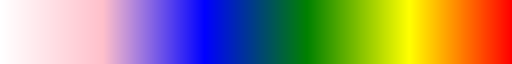

In [5]:
import matplotlib as mpl
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c0='white'
c1='pink' 
c2='blue' 
c3='green' 
c4='yellow' 
c5='red' 

n=250

colors0 = []
colors1 = []
colors2 = []
colors3 = []
colors4 = []
for x in range(n+1):
    colors0.append(colorFader(c0,c1,x/n))
    colors1.append(colorFader(c1,c2,x/n))
    colors2.append(colorFader(c2,c3,x/n))
    colors3.append(colorFader(c3,c4,x/n))
    colors4.append(colorFader(c4,c5,x/n))

colors = colors0 + colors1 + colors2 + colors3 + colors4

cmap_init = mpl.colors.ListedColormap(colors)
cmap_init

In [11]:
statios_colors = ["darkgreen","orange", "lemonchiffon","khaki", "palegoldenrod","darkblue"]
# We define stations labels and coordinates to be ploted on the map
lats = np.array([33.5,32.67,31.53,31.50,31.56,31.20,36])
lons = np.array([-5.16,-4.74,-6.30,-6.45,-6.29,-7.86, -9.8])
names = [" IFR", " MID", "", "TIC,MGN,TIZ", "", " OUK", 'spatial_mean_value']  

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()}, dpi=600) #   figsize=(11,8.5)
# Formatting figure 
plt.subplots_adjust(wspace=0.10,hspace=0.08)
set_size(12,12)      
        
# Plot climatological mean 
cs = elevation['elevation'].plot(ax=axs, cmap='terrain' , add_colorbar=False, vmin=0, 
                           vmax=4000, add_labels=False)
shapefile.boundary.plot(ax=axs, color=None, linewidth=2, linestyle='-', edgecolor='white')
            
axs.add_feature(cf.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face',
                                                         facecolor='cyan'))
# Add a rectangular patch to represent the frame
frame = axs.add_patch(
    plt.Rectangle((-10, 30), -2 + 10, 34.5 - 30,
                  facecolor='none', edgecolor='yellow', linewidth=2, transform=ccrs.PlateCarree())
)
#axs.add_feature(cf.BORDERS, color='black')

axs.set_extent([ -25, 10, 15, 40])

# Draw the coastines for each subplot
axs.coastlines()

axs.set_ylabel('latitudes',  fontsize=20)
axs.set_xlabel('longitudes',  fontsize=20)

    
#axs.set_title('elevation map',  fontsize=18)
    
# Longitude labels
axs.set_xticks(np.arange(-25,11,5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Latitude labels
axs.set_yticks(np.arange(15,41,5), crs=ccrs.PlateCarree())
lat_formatter = LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)
       
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.09, 0.73, 0.03])

# Draw the colorbar   
cb = fig.colorbar(cs, cax=cbar_ax, cmap='terrain' , label='elevation', ticks=[val for val in range(0,4000,500)], orientation='horizontal') 
cb.set_label(label='elevation in meter', weight='bold',size='large')
cb.ax.tick_params(labelsize='large')        
  
# Store figures 
plt.savefig(path_output+'/topo_large_dom.png')
plt.savefig(path_output+'/topo_large_dom.pdf')

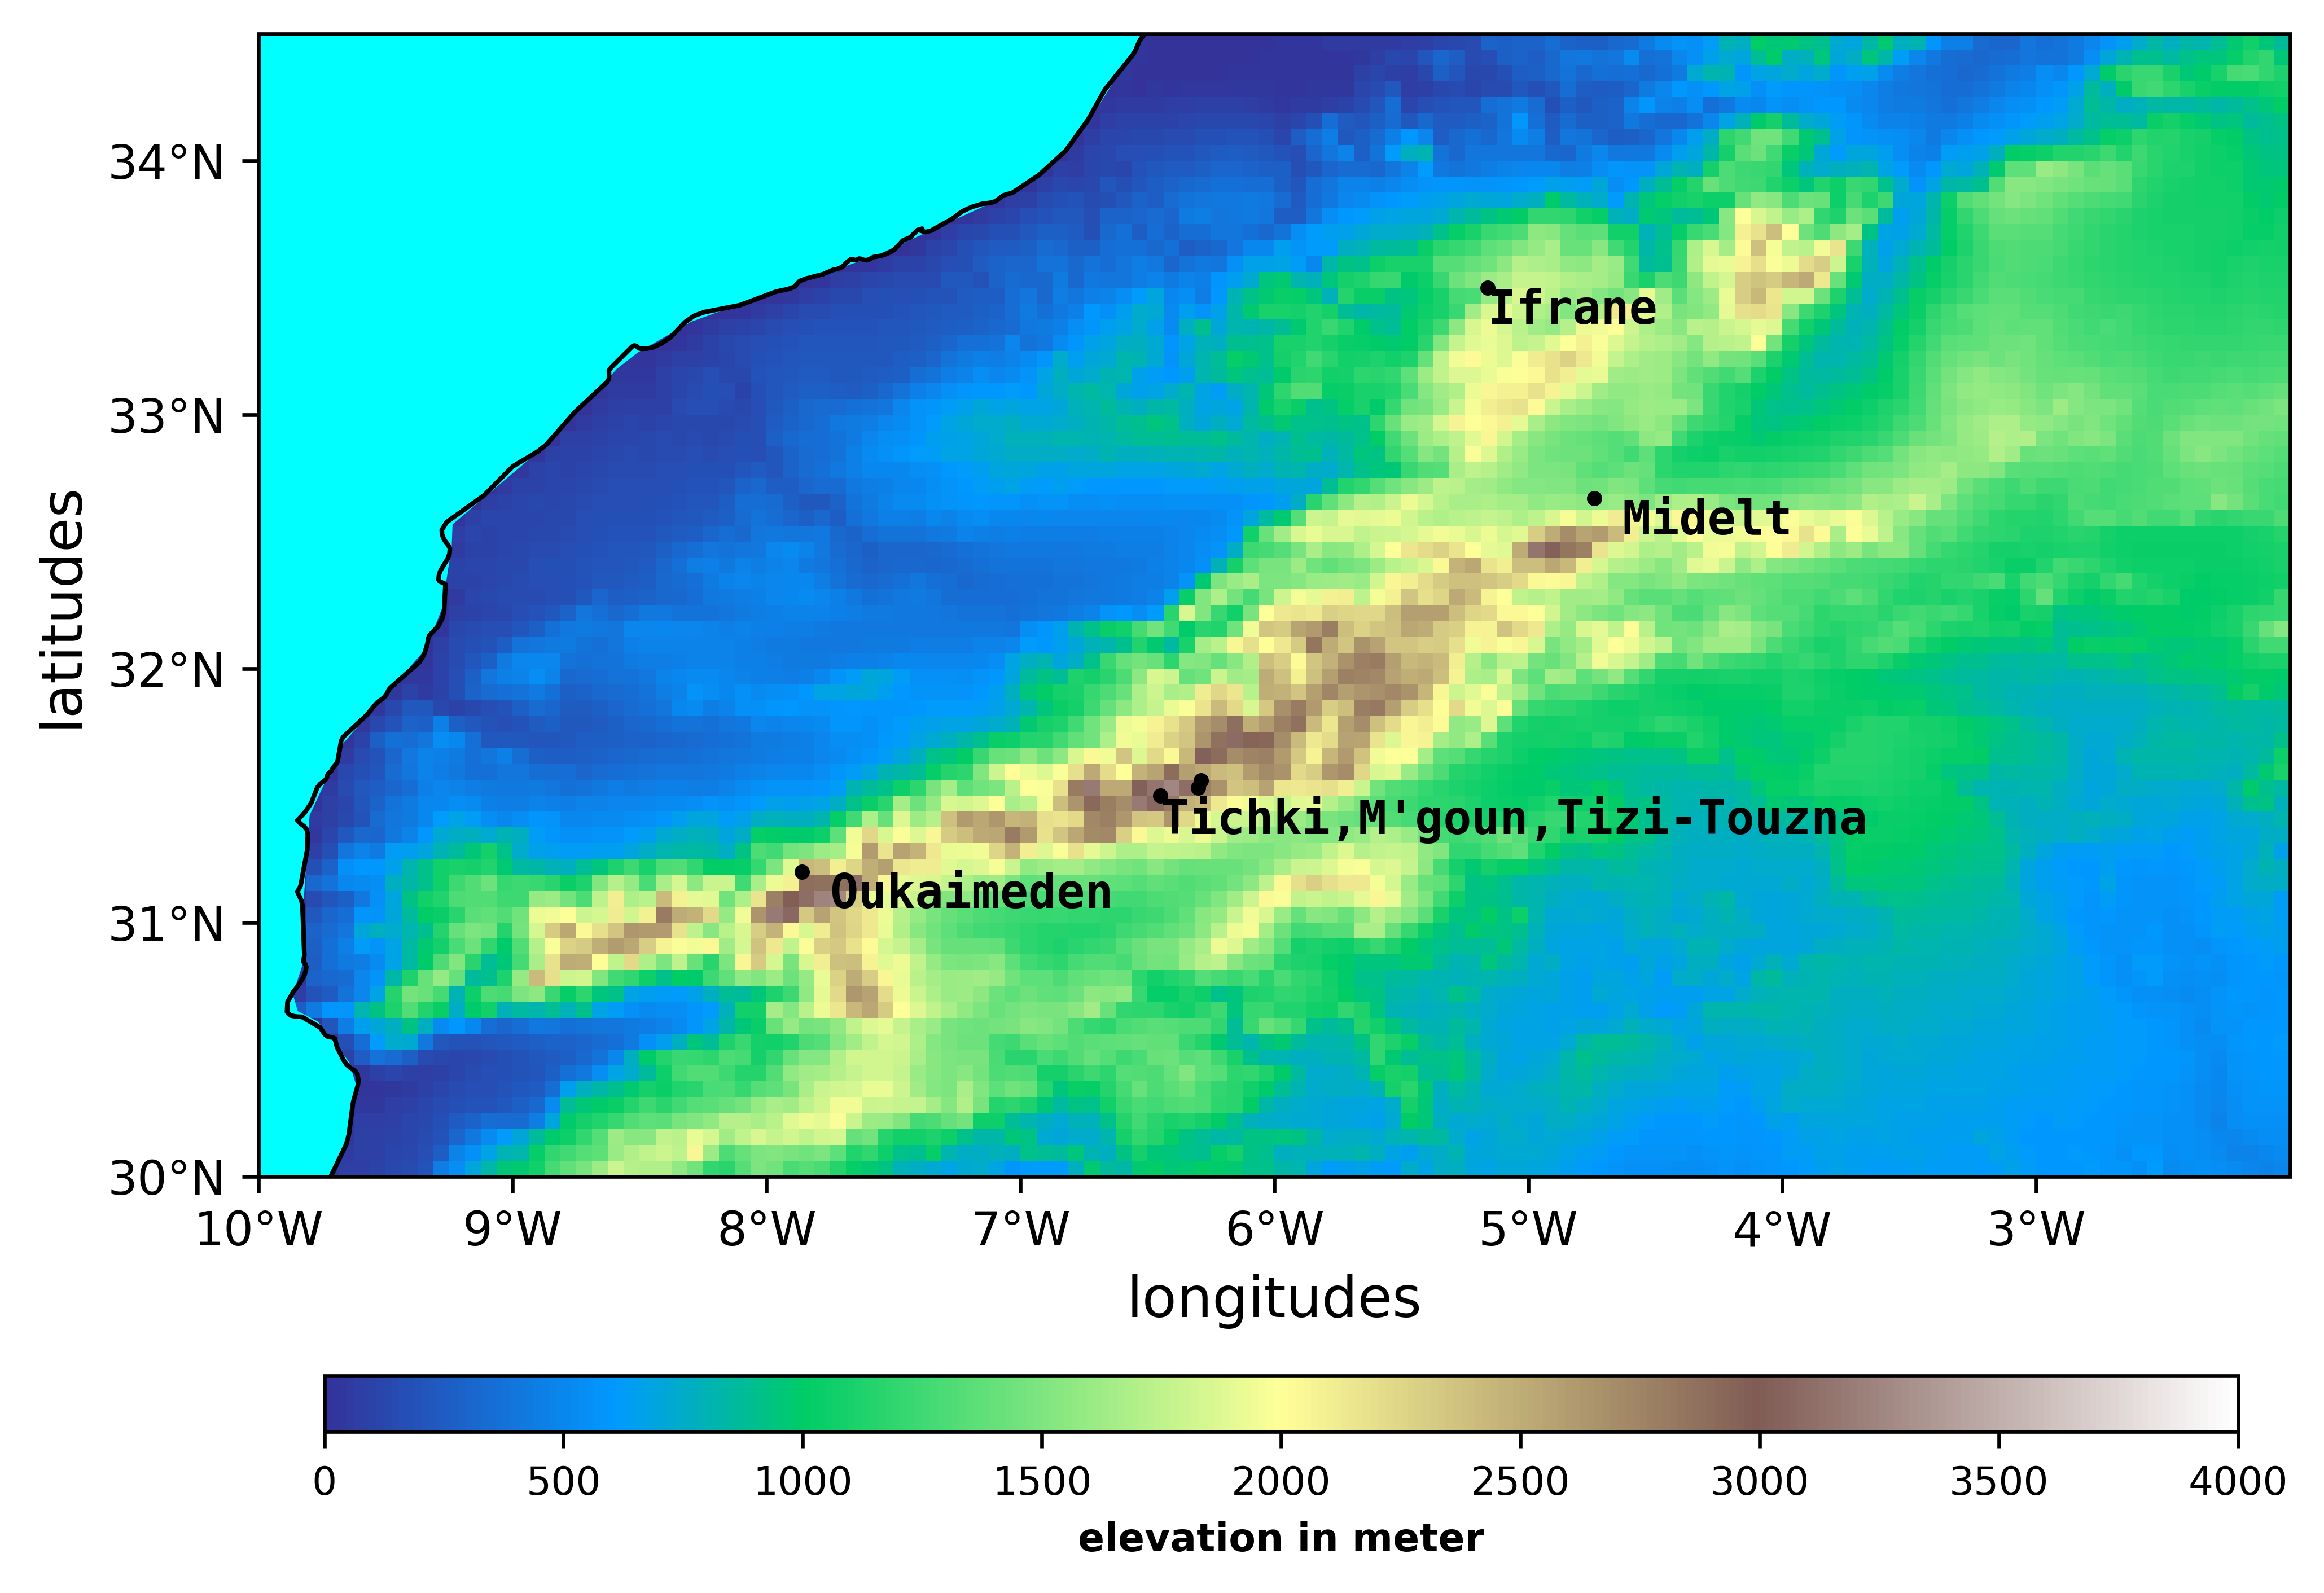

In [12]:
statios_colors = ["darkgreen","orange", "lemonchiffon","khaki", "palegoldenrod","darkblue"]
# We define stations labels and coordinates to be ploted on the map
lats = np.array([33.5,32.67,31.53,31.50,31.56,31.20])
lons = np.array([-5.16,-4.74,-6.30,-6.45,-6.29,-7.86])
names = ["Ifrane", " Midelt", "", "Tichki,M'goun,Tizi-Touzna", "", " Oukaimeden"]  

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()}, dpi=600) #   figsize=(11,8.5)
# Formatting figure 
plt.subplots_adjust(wspace=0.1,hspace=0.08)
set_size(6,8)      
        
# Plot climatological mean 
cs = elevation['elevation'].plot(ax=axs, cmap='terrain' , add_colorbar=False, vmin=0, 
                           vmax=4000, add_labels=False)

# Pointing the stations on one of the boxplots
#if ['ESA_GF','ESA_ORIG'].count(key):
axs.scatter(lons, lats, 20, color='black', marker=".", edgecolor='black')
for j in range(len(names)):
    axs.text(lons[j], lats[j], names[j], va="top", family="monospace",
                   weight="bold",fontsize=10, color='black')


axs.add_feature(cf.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face',
                                                         facecolor='cyan'))
axs.set_extent([ -10, -2, 30, 34.5])

# Draw the coastines for each subplot
axs.coastlines()

axs.set_ylabel('latitudes',  fontsize=12)
axs.set_xlabel('longitudes',  fontsize=12)

#axs.set_title('elevation map',  fontsize=18)
    
# Longitude labels
axs.set_xticks(np.arange(-10,-2,1), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Latitude labels
axs.set_yticks(np.arange(30,34.5,1), crs=ccrs.PlateCarree())
lat_formatter = LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)
       
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.26, 0.73, 0.016])

# Draw the colorbar   
cb = fig.colorbar(cs, cax=cbar_ax, cmap='terrain' , label='elevation', ticks=[val for val in range(0,4001,500)], orientation='horizontal') 
cb.set_label(label='elevation in meter', weight='bold', size='small')
cb.ax.tick_params(labelsize='small')        
  
# Store figures  
# plt.savefig(path_output+'/topo_small_dom.png')
# plt.savefig(path_output+'/topo_small_dom.pdf')